## Experimento de selección 5 halton patches para la imagen 2+_8

In [1]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, accuracy_score
from matplotlib import pyplot as plt

In [2]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
type_im = ["1+","1+","2+","2+","2+", "3+"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_images = len(images)
images_dir = [None] * n_images

classifiers=["deep_0_cross", "extra_trees_0_cross","knn_0_cross","rf_0_cross", "svm_0"]
#classifiers=["knn_0_cross","rf_0_cross", "svm_0"]

In [8]:
n_seeds = 10
n_im = len(images)
n_class = len(classifiers)
f1 = np.zeros((n_im,n_seeds,n_class))
prec = np.zeros((n_im,n_seeds,n_class))
rec = np.zeros((n_im,n_seeds,n_class))
acc = np.zeros((n_im,n_seeds,n_class))
acc_w = np.zeros((n_im,n_seeds,n_class))


for c,clf in enumerate(classifiers):
    print("classifier:", clf)
    for i in range(n_im):
        path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
        #f = os.listdir(path)
        #print(f)
        big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
        big_y0=np.load(big_target_path)
        for j in range(n_seeds):

            big_pred = np.load(path + clf + '/big_pred/' + str(j) + '_big_pred.npy')
            f1[i,j,c] = f1_score(big_y0,big_pred)
            prec[i,j,c] = precision_score(big_y0,big_pred)
            rec[i,j,c] = recall_score(big_y0,big_pred)
            acc[i,j,c] = accuracy_score(big_y0,big_pred)
            acc_w[i,j,c] = accuracy_score(big_y0,big_pred, sample_weight=0.98)
            #print(classification_report(big_y0,big_pred))
                

classifier: deep_0_cross


TypeError: Axis must be specified when shapes of a and weights differ.

## Creating new matrix with 60 rows (6 images* 10 seeds x 5 classifiers )

In [5]:
n_runs = n_seeds*n_im
f1_imgs_clfs = np.reshape(f1, (n_runs,n_class))
print(f1_imgs_clfs.shape)

(60, 5)


## Boxplot performance per classifier

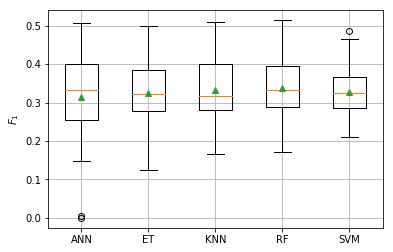

In [6]:
plt.figure()
plt.boxplot(f1_imgs_clfs,showmeans=True)
plt.xticks(range(1,6),["ANN", "ET", "KNN", "RF", "SVM"])
plt.grid()
plt.ylabel("$F_1$")
plt.show()

[ 0.32  0.32  0.33  0.34  0.33]


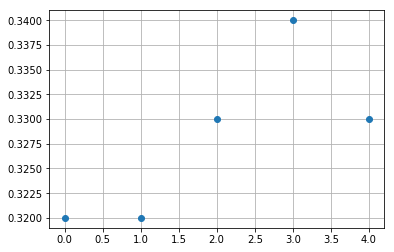

In [10]:
means = np.zeros((len(classifiers)))
for c in range(len(classifiers)):
    means[c] = np.round(f1[:,:,c].mean(),2)
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()

[ 0.57  0.54  0.49  0.54  0.36]


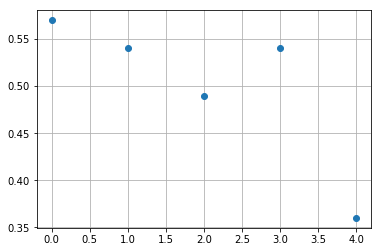

In [12]:
means = np.zeros((len(classifiers)))
for c in range(len(classifiers)):
    means[c] = np.round(prec[:,:,c].mean(),2)
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()

In [14]:
np.save("/home/rpezoa/experiment_data/output/f1_halton.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton.npy",prec)

0.4448985266664113 0.4608510716511448 0.4469711654026254


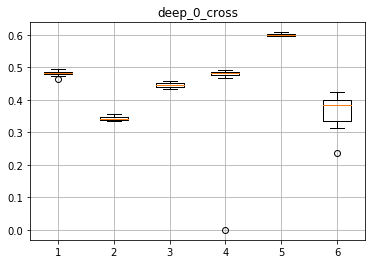

0.44735763665073824 0.4485906871554153 0.4588067665714467


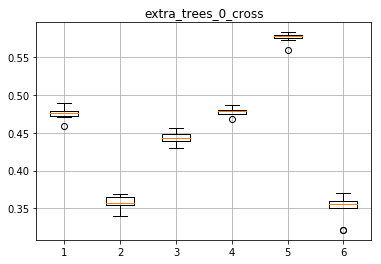

0.4456856039599648 0.43745552984811503 0.4711232442172562


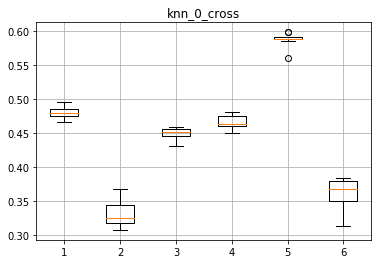

0.45639726710705975 0.45956925755513217 0.46589831149706556


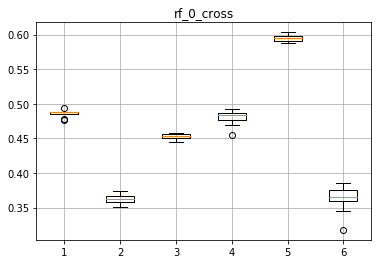

0.33197880960795156 0.22034414589027615 0.7197805867917908


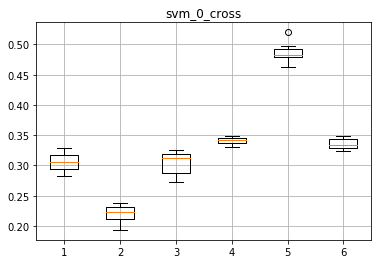

In [15]:
for c in range(len(classifiers)):
    print(f1[:,:,c].mean(),prec[:,:,c].mean(),rec[:,:,c].mean())
    plt.figure()
    plt.boxplot(f1[:,:,c].T)
    plt.grid()
    plt.title(classifiers[c])
    plt.show()

#print(f1)
#np.save("/home/rpezoa/experiment_data/output/f1_halton_SVM.npy",f1)
#np.save("/home/rpezoa/experiment_data/output/prec_halton_SVM.npy",prec)

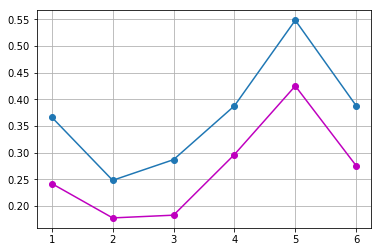

In [26]:
plt.figure()
plt.plot(range(1,7),f1[:,0],'o-')
plt.plot(range(1,7),prec[:,0],'o-m')
#plt.plot(range(1,n+1),rec,'o-y')
plt.grid()
plt.show()

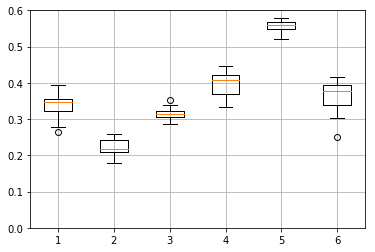

In [28]:
plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.6)
plt.show()

## Deep Learning

In [37]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'deep/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))

In [38]:
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_Deep.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_Deep.npy",prec)

[[ 0.36364249  0.38605867  0.31883898  0.37239776  0.41588498  0.38992289
   0.41549455  0.36564381  0.29841197  0.40237627]
 [ 0.23448314  0.23676454  0.22010364  0.22614309  0.23630434  0.24958954
   0.242135    0.23305333  0.28290505  0.27864563]
 [ 0.27062721  0.26637966  0.34109069  0.32669935  0.27957094  0.32683095
   0.32380337  0.3271533   0.29986859  0.29646966]
 [ 0.39296996  0.44754297  0.45245399  0.45379321  0.41237013  0.40241065
   0.4133268   0.41649892  0.45070858  0.42495307]
 [ 0.60762351  0.55343712  0.60658225  0.56405512  0.53213842  0.55983927
   0.56087079  0.57798311  0.60018646  0.57294392]
 [ 0.25686093  0.40031286  0.06204743  0.34825848  0.23034421  0.3061918
   0.39174886  0.28057885  0.42921049  0.41282335]]


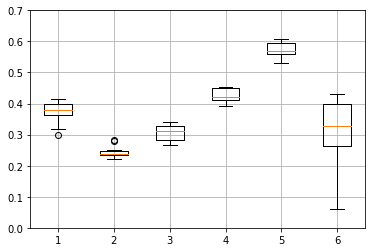

In [40]:
plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

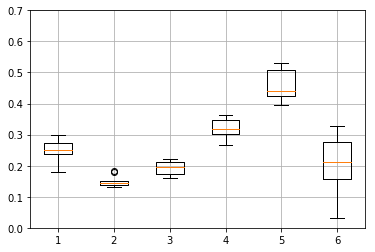

In [41]:
plt.figure()
plt.boxplot(prec.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## Random Forest

[[ 0.39155     0.33189239  0.31025611  0.37415754  0.40933398  0.34443663
   0.42689892  0.38233546  0.31678953  0.38399517]
 [ 0.27584455  0.26833669  0.24991456  0.22489585  0.21061641  0.25859224
   0.24321513  0.24631879  0.27667819  0.25805071]
 [ 0.28180397  0.29777514  0.33456058  0.34693544  0.31326607  0.33123161
   0.30072344  0.33666925  0.31863453  0.31481084]
 [ 0.4153228   0.43348572  0.43633119  0.4453562   0.42779024  0.35178959
   0.41677802  0.41813565  0.4297272   0.40688602]
 [ 0.57594909  0.54303052  0.5889825   0.57567469  0.52768943  0.52158112
   0.58049404  0.58356631  0.5765541   0.55679244]
 [ 0.42222287  0.3905697   0.39265976  0.36408341  0.34556898  0.33234047
   0.40498504  0.32489846  0.41319871  0.41242551]]


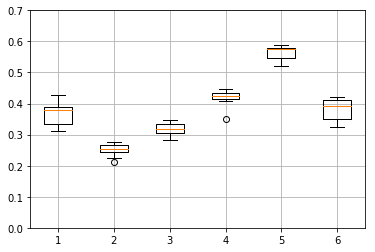

In [42]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'rf/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_rf.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_rf.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## KNN

[[ 0.34087626  0.27871359  0.22961485  0.33987319  0.36386697  0.32170363
   0.39823136  0.35422875  0.2779432   0.32837156]
 [ 0.24662977  0.2332466   0.21680704  0.18154918  0.19238001  0.21858673
   0.21898567  0.19696432  0.24292413  0.25106856]
 [ 0.2646629   0.27199622  0.3128952   0.29680468  0.28280488  0.28046119
   0.26807016  0.31028032  0.29071204  0.2781378 ]
 [ 0.39849221  0.388937    0.39092889  0.40632896  0.38851507  0.31029671
   0.39021265  0.379512    0.39349234  0.30239743]
 [ 0.55861603  0.51922722  0.57649487  0.54191287  0.51558412  0.50007491
   0.55758859  0.55313068  0.5708075   0.53386982]
 [ 0.40543107  0.39481048  0.36239396  0.33927588  0.32123422  0.34506054
   0.38264615  0.31263492  0.39927777  0.41214637]]


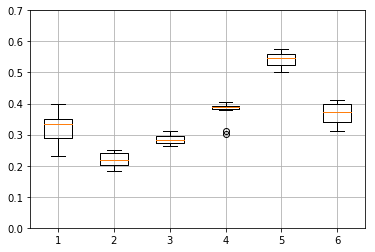

In [43]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'knn/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_knn.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_knn.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## Extra Trees

In [ ]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'knn/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_knn.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_knn.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()